<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE40455-2020](https://jckantor.github.io/CBE40455-2020);
content is available [on Github](https://github.com/jckantor/CBE40455-2020.git).*


<!--NAVIGATION-->
< [7.0 Risk and Diversification](https://jckantor.github.io/CBE40455-2020/07.00-Risk-and-Diversification.html) | [Contents](toc.html) | [7.2 Geometric Brownian Motion](https://jckantor.github.io/CBE40455-2020/07.02-Geometric-Brownian-Motion.html) ><p><a href="https://colab.research.google.com/github/jckantor/CBE40455-2020/blob/master/docs/07.01-Measuring-Return.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE40455-2020/07.01-Measuring-Return.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 7.1 Measuring Return

How much does one earn relative to the amount invested? 

This is the basic concept of return, and one of the fundamental measurements of financial performance. This notebook examines the different ways in which return can be measured.

## 7.1.1 Pandas-datareader

As will be shown below, [pandas-datareader](https://github.com/pydata/pandas-datareader) provides a convenient means access and manipulate financial data using the Pandas library. The pandas-datareader is normally imported separately from pandas. Typical installation is

    pip install pandas-datareader

from a terminal window, or executing

    !pip install pandas-datareader

in a Jupyter notebook cell. Google Colab environment now includes pandas-datareader, so separate installation is required.

## 7.1.2 Imports

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import datetime

import pandas as pd
import pandas_datareader as pdr

## 7.1.3 Where to get Price Data

This notebook uses the price of stocks and various commodity goods for the purpose of demonstrating returns. Price data is available from a number of sources. Here we demonstrate the process of obtaining price data on financial goods from [Yahoo Finance](http://finance.yahoo.com/) and downloading price data sets from [Quandl](http://www.quandl.com/). (UPDATE: [Look here for an alternative descripton of how to get live market data from Yahoo Finance](https://towardsdatascience.com/python-how-to-get-live-market-data-less-than-0-1-second-lag-c85ee280ed93).)

The most comprehensive repositories of financial data are commercial enterprises. Some provide a free tier of service for limited use, typically 50 inquires a day or several hundred a month. Some require registration to access the free tier. These details are a constantly changing. A listing of free  services is available from [awesome-quant](https://github.com/wilsonfreitas/awesome-quant#data-sources), but please note that details change quickly. [Another useful collection of stock price data using Python](https://towardsdatascience.com/how-to-get-stock-data-using-python-c0de1df17e75).

### 7.1.3.1 Stock Symbols

Stock price data is usually indexed and accessed by stock symbols. Stock symbols are unique identifiers for a stock, commodity, or other financial good on a specific exchanges. For example, [this is a list of symbols for the New York Stock Exchange (NYSE)](http://www.eoddata.com/symbols.aspx?AspxAutoDetectCookieSupport=1) The following function looks up details of stock symbol on yahoo finance..

In [41]:
# python libraray for accessing internet resources
import requests

def lookup_yahoo(symbol):
    """Return a list of all matches for a symbol on Yahoo Finance."""
    url = f"http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={symbol}&region=1&lang=en"
    return requests.get(url).json()["ResultSet"]["Result"]

lookup_yahoo("XOM")

[{'exch': 'NYQ',
  'exchDisp': 'NYSE',
  'name': 'Exxon Mobil Corporation',
  'symbol': 'XOM',
  'type': 'S',
  'typeDisp': 'Equity'},
 {'exch': 'NMS',
  'exchDisp': 'NASDAQ',
  'name': 'XOMA Corporation',
  'symbol': 'XOMA',
  'type': 'S',
  'typeDisp': 'Equity'},
 {'exch': 'YHD',
  'exchDisp': 'Industry',
  'name': 'Exxon Mobil Corporation',
  'symbol': 'XOM.BA',
  'type': 'S',
  'typeDisp': 'Equity'},
 {'exch': 'YHD',
  'exchDisp': 'Industry',
  'name': 'Exxon Mobil Corporation',
  'symbol': 'XOM.MX',
  'type': 'S',
  'typeDisp': 'Equity'},
 {'exch': 'DUS',
  'exchDisp': 'Dusseldorf Stock Exchange',
  'name': 'XOMA CORP.  DL -,0005',
  'symbol': 'X0M1.DU',
  'type': 'S',
  'typeDisp': 'Equity'},
 {'exch': 'STU',
  'exchDisp': 'Stuttgart',
  'name': 'XOMA Corp. Registered Shares DL',
  'symbol': 'X0M1.SG',
  'type': 'S',
  'typeDisp': 'Equity'},
 {'exch': 'TLO',
  'exchDisp': 'TLX Exchange',
  'name': 'Exxon Mobil Corporation',
  'symbol': 'XOM-U.TI',
  'type': 'S',
  'typeDisp': 'Eq

In [42]:
def get_symbol(symbol):
    """Return exact match for a symbol."""
    result = [r for r in lookup_yahoo(symbol) if symbol == r['symbol']]
    return result[0] if len(result) > 0 else None

get_symbol('TSLA')

{'exch': 'NMS',
 'exchDisp': 'NASDAQ',
 'name': 'Tesla, Inc.',
 'symbol': 'TSLA',
 'type': 'S',
 'typeDisp': 'Equity'}

### 7.1.3.2 Yahoo Finance

[Yahoo Finance](http://finance.yahoo.com/) provides historical Open, High, Low, Close, and Volume date for quotes on traded securities. In addition, Yahoo Finance provides historical [Adjusted Close](http://marubozu.blogspot.com/2006/09/how-yahoo-calculates-adjusted-closing.html) price data that corrects for splits and dividend distributions. Adjusted Close is a useful tool for computing the return on long-term investments.

The following cell demonstrates how to download historical Adjusted Close price for a selected security into a pandas DataFrame.

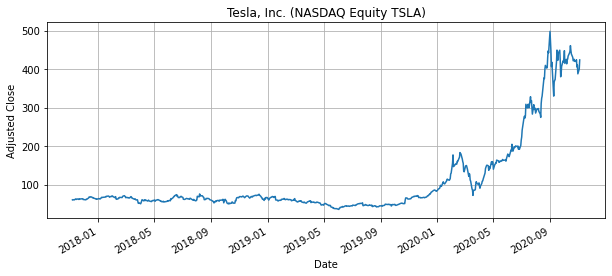

In [43]:
symbol = 'TSLA'

# get symbol data
symbol_data = get_symbol(symbol)
assert symbol_data, f"Symbol {symbol} wasn't found."

# start and end of a three year interval that ends today
end = datetime.datetime.today().date()
start = end - datetime.timedelta(3*365)

# get stock price data
S = pdr.data.DataReader(symbol, "yahoo", start, end)['Adj Close']

# plot data
plt.figure(figsize=(10,4))
title = f"{symbol_data['name']} ({symbol_data['exchDisp']} {symbol_data['typeDisp']} {symbol_data['symbol']})"
S.plot(title=title)
plt.ylabel('Adjusted Close')
plt.grid()

Note that `S` is an example of a Pandas time series.

In [44]:
S

Date
2017-11-06     60.556000
2017-11-07     61.209999
2017-11-08     60.877998
2017-11-09     60.598000
2017-11-10     60.598000
                 ...    
2020-10-28    406.019989
2020-10-29    410.829987
2020-10-30    388.040009
2020-11-02    400.510010
2020-11-03    424.140015
Name: Adj Close, Length: 754, dtype: float64

Pandas time series are indexed by datetime entries. There is a large collection of functions in Pandas for manipulating time series data.

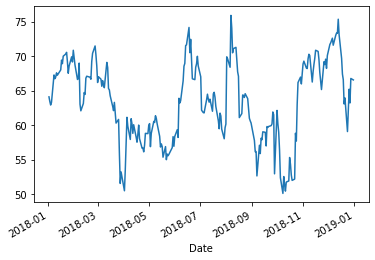

In [52]:
S["2018"].plot()

### 7.1.3.3 Quandl

[Quandl](http://www.quandl.com/) is a searchable source of time-series data on a wide range of commodities, financials, and many other economic and social indicators. Data from Quandl can be downloaded as files in various formats, or accessed directly using the [Quandl API](http://www.quandl.com/help/api) or software-specific package. Here we use demonstrate use of the [Quandl Python package](http://www.quandl.com/help/packages#Python). 

The first step is execute a system command to check that the Quandl package has been installed.

Here are examples of energy datasets. These were found by searching Quandl, then identifying the Quandl code used for accessing the dataset, a description, the name of the field containing the desired price information.

In [46]:
%%capture
capture = !pip install quandl

In [47]:
code = 'CHRIS/MCX_CL1'
description = 'NYMEX Crude Oil Futures, Continuous Contract #1 (CL1) (Front Month)'
field = 'Close'

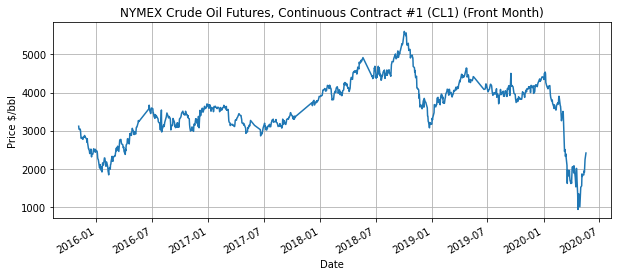

In [48]:
import quandl

end = datetime.datetime.today().date()
start = end - datetime.timedelta(5*365)

try:
    S = quandl.get(code, collapse='daily', trim_start=start.isoformat(), trim_end=end.isoformat())[field]

    plt.figure(figsize=(10,4))
    S.plot()
    plt.title(description)
    plt.ylabel('Price $/bbl')
    plt.grid()
except:
    pass

## 7.1.4 Returns

The statistical properties of financial series are usually studied in terms of the change in prices. There are several reasons for this, key among them is that the changes can often be closely approximated as stationary random variables whereas prices are generally non-stationary sequences. 

A common model is 

$$S_{t} = R_{t} S_{t-1}$$

so, recursively,

$$S_{t} = R_{t} R_{t-1} \cdots R_{0} S_{0}$$

The gross return $R_t$ is simply the ratio of the current price to the previous, i.e.,

$$R_t = \frac{S_t}{S_{t-1}}$$

$R_t$ will typically be a number close to one in value. The return is greater than one for an appreciating asset, or less than one for a declining asset.

The Pandas timeseries `shift()` function is used compute the ratio $\frac{S_t}{S_{t-1}}$. Shifting a timeseries 1 day forward, i.e, `shift(1)`, shifts $S_{t-1}$ to time $t$. That's why 

    R = S/S.shift(1)

provides the correct calculation for the quantities $R_t$.

In [54]:
print([S, S.shift(1)])

[Date
2017-11-06     60.556000
2017-11-07     61.209999
2017-11-08     60.877998
2017-11-09     60.598000
2017-11-10     60.598000
                 ...    
2020-10-28    406.019989
2020-10-29    410.829987
2020-10-30    388.040009
2020-11-02    400.510010
2020-11-03    424.160004
Name: Adj Close, Length: 754, dtype: float64, Date
2017-11-06           NaN
2017-11-07     60.556000
2017-11-08     61.209999
2017-11-09     60.877998
2017-11-10     60.598000
                 ...    
2020-10-28    424.679993
2020-10-29    406.019989
2020-10-30    410.829987
2020-11-02    388.040009
2020-11-03    400.510010
Name: Adj Close, Length: 754, dtype: float64]


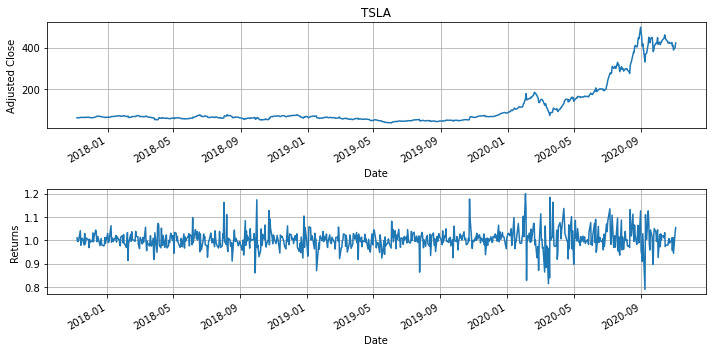

In [55]:
symbol = 'TSLA'

end = datetime.datetime.today().date()
start = end - datetime.timedelta(3*365)

# get stock price data
S = pdr.data.DataReader(symbol, "yahoo", start, end)['Adj Close']
R = S/S.shift(1)

# plot data
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
S.plot(title=symbol)
plt.ylabel('Adjusted Close')
plt.grid()

plt.subplot(2, 1,  2)
R.plot()
plt.ylabel('Returns')
plt.grid()
plt.tight_layout()

### 7.1.4.1 Linear fractional or Arithmetic Returns

Perhaps the most common way of reporting returns is simply the fractional increase in value of an asset over a period, i.e.,

$$r^{lin}_t = \frac{S_t - S_{t-1}}{S_{t-1}} = \frac{S_t}{S_{t-1}} - 1 $$

Obviously

$$r^{lin}_t = R_t  - 1$$

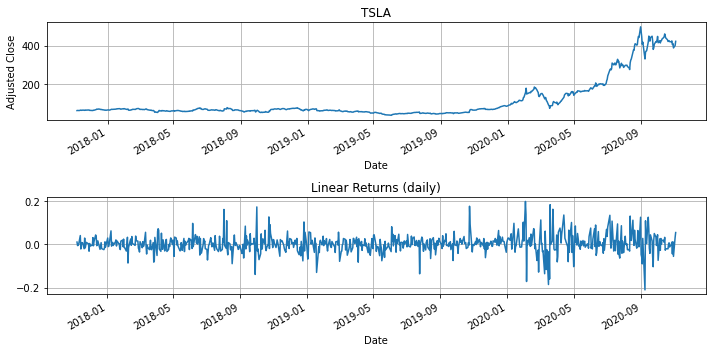

In [57]:
symbol = 'TSLA'

end = datetime.datetime.today().date()
start = end - datetime.timedelta(3*365)

# get stock price data
S = pdr.data.DataReader(symbol, "yahoo", start, end)['Adj Close']
rlin = S/S.shift(1) - 1

# plot data
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
S.plot(title=symbol)
plt.ylabel('Adjusted Close')
plt.grid()

plt.subplot(2,1,2)
rlin.plot()
plt.title('Linear Returns (daily)')
plt.grid()
plt.tight_layout()

### 7.1.4.2 Linear returns don't tell the whole story.

Suppose you put money in an asset that returns 10% interest in even numbered years, but loses 10% in odd numbered years. Is this a good investment for the long-haul?

If we look at mean linear return

\begin{align}
\bar{r}^{lin} & = \frac{1}{T}\sum_{t=1}{T} r^{lin}_t  \\
& = \frac{1}{T} (0.1 - 0.1 + 0.1 - 0.1 + \cdots) \\
& = 0
\end{align}

we would conclude this asset, on average, offers zero return. What does a simulation show?

Text(0, 0.5, 'Value')

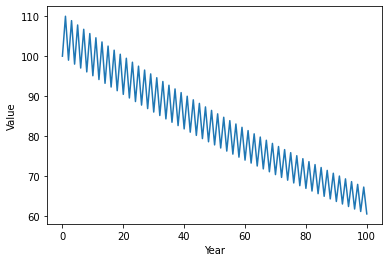

In [ ]:
S = 100
log = [[0,S]]
r = 0.10

for k in range(1,101):
    S = S + r*S
    r = -r
    log.append([k,S])
    
df = pd.DataFrame(log,columns = ['k','S'])
plt.plot(df['k'],df['S'])
plt.xlabel('Year')
plt.ylabel('Value')

Despite an average linear return of zero, what we observe over time is an asset declining in price.  The reason is pretty obvious --- on average, the years in which the asset loses money have higher balances than years where the asset gains value.  Consequently, the losses are somewhat greater than the gains which, over time, leads to a loss of value.

Here's a real-world example of this phenomenon. For a three year period ending October 24, 2017, United States Steel (stock symbol 'X') offers an annualized linear return of 15.9%. Seems like a terrific investment opportunity, doesn't it?  Would you be surprised to learn that the actual value of the stock fell 18.3% over that three-year period period?

What we can conclude from these examples is that average linear return, by itself, does not provide us with the information needed for long-term investing.

Three year return : -18.27174276977313 %


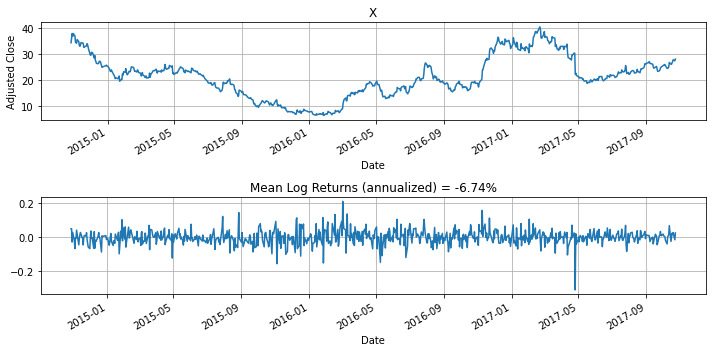

In [ ]:
symbol = 'X'

end = datetime.datetime(2017, 10, 24)
start = end-datetime.timedelta(3*365)

# get stock price data
S = pdr.data.DataReader(symbol, "yahoo", start, end)['Adj Close']
rlin = S/S.shift(1) - 1
rlog = np.log(S/S.shift(1))

print('Three year return :', 100*(S[-1]-S[0])/S[0], '%')

# plot data
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
S.plot(title=symbol)
plt.ylabel('Adjusted Close')
plt.grid()

plt.subplot(2,1,2)
rlog.plot()
plt.title('Mean Log Returns (annualized) = {0:.2f}%'.format(100*252*rlog.mean()))
plt.grid()
plt.tight_layout()

### 7.1.4.3 Compounded Log Returns

Compounded, or log returns, are defined as

$$r^{log}_{t} = \log R_t = \log \frac{S_{t}}{S_{t-1}}$$

The log returns have a very useful compounding property for aggregating price changes across time

$$ \log \frac{S_{t+k}}{S_{t}} = r^{log}_{t+1} + r^{log}_{t+2} + \cdots + r^{log}_{t+k}$$

If the compounded returns are statistically independent and identically distributed, then this property provides a means to aggregate returns and develop statistical price projections.

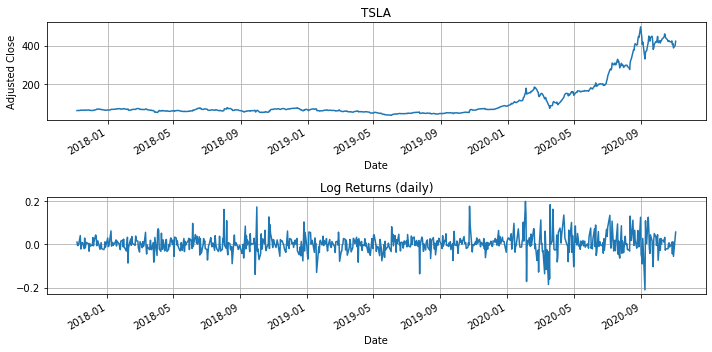

In [ ]:
symbol = 'TSLA'

end = datetime.datetime.today().date()
start = end - datetime.timedelta(3*365)

# get stock price data
S = pdr.data.DataReader(symbol, "yahoo", start, end)['Adj Close']
rlog = np.log(S/S.shift(1))

# plot data
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
S.plot(title=symbol)
plt.ylabel('Adjusted Close')
plt.grid()

plt.subplot(2,1,2)
rlin.plot()
plt.title('Log Returns (daily)')
plt.grid()
plt.tight_layout()

### 7.1.4.4 Volatility Drag and the Relationship between Linear and Log Returns

For long-term financial decision making, it's important to understand the relationship between $r_t^{log}$ and $r_t^{lin}$. Algebraically, the relationships are simple.

$$r^{log}_t = \log \left(1+r^{lin}_t\right)$$

$$r^{lin}_t = e^{r^{log}_t} - 1$$

The linear return $r_t^{lin}$ is the fraction of value that is earned from an asset in a single period. It is a direct measure of earnings. The average value $\bar{r}^{lin}$ over many periods this gives the average fractional earnings per period. If you care about consuming the earnings from an asset and not about growth in value, then $\bar{r}^{lin}$ is the quantity of interest to you.

Log return $r_t^{log}$ is the rate of growth in value of an asset over a single period. When averaged over many periods, $\bar{r}^{log}$ measures the compounded rate of growth of value. If you care about the growth in value of an asset, then $\bar{r}^{log}$ is the quantity of interest to you.

The compounded rate of growth $r_t^{log}$ is generally smaller than average linear return $\bar{r}^{lin}$ due to the effects of volatility. To see this, consider an asset that has a linear return of -50% in period 1, and +100% in period 2. The average linear return is would be +25%, but the compounded growth in value would be 0%.

A general formula for the relationship between $\bar{r}^{log}$ and $\bar{r}^{lin}$ is derived as follows:

$$\begin{align*}
\bar{r}^{log} & = \frac{1}{T}\sum_{t=1}^{T} r_t^{log} \\
& = \frac{1}{T}\sum_{t=1}^{T} \log\left(1+r_t^{lin}\right) \\
& = \frac{1}{T}\sum_{t=1}^{T} \left(\log(1) + r_t^{lin} - \frac{1}{2} (r_t^{lin})^2 + \cdots
\right) \\
& = \frac{1}{T}\sum_{t=1}^{T} r_t^{lin} - \frac{1}{2}\frac{1}{T}\sum_{t=1}^{T} (r_t^{lin})^2 + \cdots \\
& = \bar{r}^{lin} - \frac{1}{2}\left(\frac{1}{T}\sum_{t=1}^{T} (r_t^{lin})^2\right) + \cdots \\
& = \bar{r}^{lin} - \frac{1}{2}\left((\bar{r}^{lin})^2 + \frac{1}{T}\sum_{t=1}^{T} (r_t^{lin}-\bar{r}^{lin})^2\right) + \cdots
\end{align*}$$

For typical values $\bar{r}^{lin}$ of and long horizons $T$, this results in a formula

$$\begin{align*}
\bar{r}^{log} & \approx \bar{r}^{lin} - \frac{1}{2} \left(\sigma^{lin}\right)^2
\end{align*}$$

where $\sigma^{lin}$ is the standard deviation of linear returns, more commonly called the volatility.

The difference $- \frac{1}{2} \left(\sigma^{lin}\right)^2$ is the _volatility drag_ imposed on the compounded growth in value of an asset due to volatility in linear returns. This can be significant and a source of confusion for many investors. 

It's indeed possible to have a positive average linear return, but negative compounded growth.  To see this, consider a \$100 investment which earns 20% on even-numbered years, and loses 18% on odd-numbered years. The average linear return is 1%, and the average log return is -0.81%.



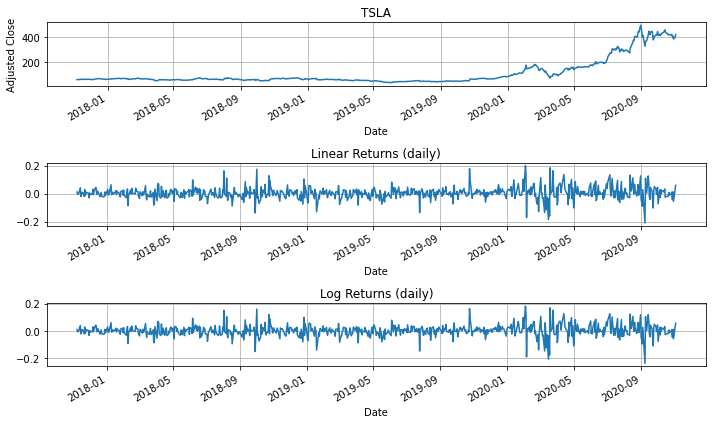

In [61]:
symbol = 'TSLA'

end = datetime.datetime.today().date()
start = end - datetime.timedelta(3*365)

# get stock price data
S = pdr.data.DataReader(symbol, "yahoo", start,  end)['Adj Close']
rlin = (S - S.shift(1))/S.shift(1)
rlog = np.log(S/S.shift(1))

# plot data
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
S.plot(title=symbol)
plt.ylabel('Adjusted Close')
plt.grid()

plt.subplot(3,1,2)
rlin.plot()
plt.title('Linear Returns (daily)')
plt.grid()
plt.tight_layout()

plt.subplot(3,1,3)
rlog.plot()
plt.title('Log Returns (daily)')
plt.grid()
plt.tight_layout()

In [62]:
print("Mean Linear Return (rlin) = {0:.7f}".format(rlin.mean()))
print("Linear Volatility (sigma) = {0:.7f}".format(rlin.std()))
print("Volatility Drag -0.5*sigma**2 = {0:.7f}".format(-0.5*rlin.std()**2))
print("rlin - 0.5*vol = {0:.7f}\n".format(rlin.mean() - 0.5*rlin.std()**2))

print("Mean Log Return = {0:.7f}".format(rlog.mean()))

Mean Linear Return (rlin) = 0.0034779
Linear Volatility (sigma) = 0.0422834
Volatility Drag -0.5*sigma**2 = -0.0008939
rlin - 0.5*vol = 0.0025840

Mean Log Return = 0.0025842


In [63]:
symbols = ['AAPL','MSFT','F','XOM','GE','X','TSLA','NIO']

end = datetime.datetime.today().date()
start = end -  datetime.timedelta(3*365)

rlin = []
rlog = []
sigma = []

for symbol in symbols:

    # get stock price data
    S = pdr.data.DataReader(symbol, "yahoo", start,  end)['Adj Close']
    r = (S - S.shift(1))/S.shift(1)
    rlin.append(r.mean()) 
    rlog.append((np.log(S/S.shift(1))).mean())
    sigma.append(r.std())
    

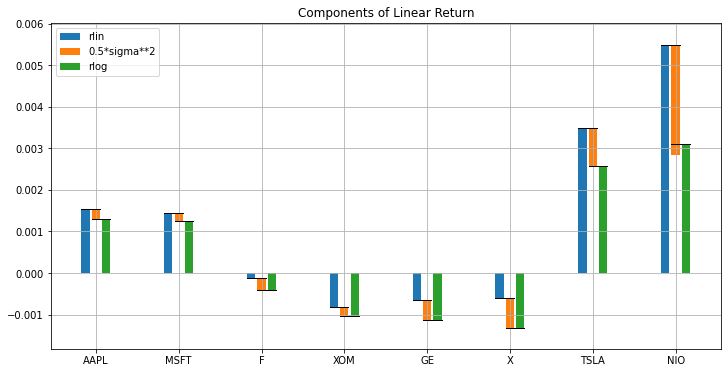

In [71]:
import seaborn as sns
N = len(symbols)
idx = np.arange(N)
width = 0.2

plt.figure(figsize=(12, 6))

p0 = plt.bar(2*idx - 1.25*width, rlin, width)
p1 = plt.bar(2*idx, -0.5*np.array(sigma)**2, width, bottom=rlin)
p2 = plt.bar(2*idx + 1.25*width, rlog, width)

for k in range(0,N):
    plt.plot([2*k - 1.75*width, 2*k + 0.5*width], [rlin[k], rlin[k]], 'k', lw=1)
    plt.plot([2*k - 0.5*width, 2*k + 1.75*width], [rlog[k], rlog[k]], 'k', lw=1)
    
plt.xticks(2*idx, symbols)
plt.legend((p0[0], p1[0], p2[0]), ('rlin', '0.5*sigma**2', 'rlog'))
plt.title('Components of Linear Return')
plt.ylim(1.1*np.array(plt.ylim()))
plt.grid()

<!--NAVIGATION-->
< [7.0 Risk and Diversification](https://jckantor.github.io/CBE40455-2020/07.00-Risk-and-Diversification.html) | [Contents](toc.html) | [7.2 Geometric Brownian Motion](https://jckantor.github.io/CBE40455-2020/07.02-Geometric-Brownian-Motion.html) ><p><a href="https://colab.research.google.com/github/jckantor/CBE40455-2020/blob/master/docs/07.01-Measuring-Return.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/CBE40455-2020/07.01-Measuring-Return.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>